Statistical Arbitrage, Group 6
Dataset source obtained through yfinance library. https://pypi.org/project/yfinance

##Problem Framing

We seek to make profits on two correlated stocks. Using the historical prices we calculate the linear relationship between the stocks. We then try to find occurrences where the relationship doesn’t hold but converges at a future date. Finding these occurrences is an opportunity for profit. We perform a classification task by applying machine learning models to classify the data as likely to revert to the mean or unlikely to revert to the mean. It is then possible to use the classification results to buy or short the two stocks, benefiting anybody who uses the classification to trade on the stock exchange by generating a profit on average. The dataset has 4 features and 911 feature vectors.


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf

In [7]:
tickers = ['AMAT','NXPI']
df = yf.download(tickers,start='2020-01-01')['Close']
rolling_window = 21*12 #One year has roughly 252 trading days so this is a 1 year rolling window. Or, 21 days per month
stock1,stock2 = tickers

C:\Users\risha\AppData\Local\Temp\ipykernel_33740\119855505.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers,start='2020-01-01')['Close']
[*********************100%***********************]  2 of 2 completed


#Spread by Rishav Patel

#Why?
#Spread is an important feature because it will tell us the difference between the historical linear relationship (calculated using linear regression) and the current relationship. In essence it is the difference between stock1's actual value and stock2's predicted value using a a coefficient beta and a intercept alpha which were obtained through linear regression. We can use spread to find out when the two stocks are diverging, which is an opportunity for profit.

#How?
#Using a rolling window of 252, we grab 252 days of prices between two stocks, fit them to a line of best fit such that stock1 predicts stock2, and then calculate spread for this rolling window by subtracting the actual value of stock 2 from the value of (stock1*coefficient + intercept). We then repeat this process by grabbing a new rolling window except we shift the window by 1 (in a for loop). The loop continues until the rolling window is iterated all the way to the latest price and a rolling spread has been calculated for every day. 

#Missing Values
#Because we are using a window of 252, we automatically lack the data necessary to begin generating rolling data for the first 251 days of the dataset. This data will be used for rolling spread of later days but the rolling spread for that data cannot be computed. Hence we remove these rows from our data.

#Code:
#Rolling alpha is the intercept for each window and rolling beta is the coefficient for each window, obtained by linear regression. We calculate it like so:


Missing values in spread:
 252

First 10 values of spread:
 Date
2020-12-31    -7.047660
2021-01-04    -5.011902
2021-01-05    -6.117371
2021-01-06    -5.175174
2021-01-07    -5.459429
2021-01-08    -6.877405
2021-01-11   -12.283602
2021-01-12   -12.505169
2021-01-13    -7.488086
2021-01-14   -17.463883
dtype: float64


<Axes: title={'center': 'Spread'}, xlabel='Date'>

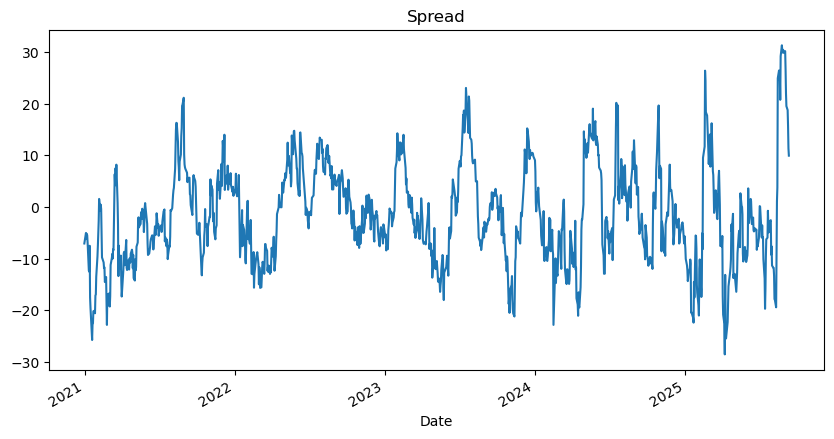

In [13]:
rolling_alpha = [np.nan] * rolling_window
rolling_beta = [np.nan] * rolling_window
for i in range(rolling_window, len(df)):
    past_data = df.iloc[i-rolling_window:i]
    
    X = past_data[stock1].values
    y = past_data[stock2].values
    X = sm.add_constant(X)

    model = sm.OLS(y,X).fit()
    rolling_alpha.append(model.params[0])
    rolling_beta.append(model.params[1])
rolling_params = pd.DataFrame({'Rolling Alpha':rolling_alpha,'Rolling Beta':rolling_beta},index=df.index)

#Calculates the spread of the data. 
spread = df[stock2] - (rolling_params['Rolling Alpha'] + rolling_params['Rolling Beta'] * df[stock1])

#Check to see how many missing values exist
print("\nMissing values in spread:\n",spread.isnull().sum())

#Check the first 10 valid values to ensure it runs
spread = spread.dropna()
print("\nFirst 10 values of spread:\n",spread.head(10))

#Plot for spread
spread.plot(title="Spread", figsize = (10,5))

#RollingMean by Jared Martinez

#Why?
I calculated the rolling mean of the spread between AMAT and NXPI. The rolling mean smooths out short-term noise in the spread and shows its underlying trend, helping investors see if the relationship is drifting or reverting. This insight can guide better timing and strategy decisions.

#How?  * use a sliding  window to computer the average sprea at each step  * Shift the window by 1 day at a time to generate a rollign sequence of mean values. * this provides a time seris of moving averages that track the central tendency of the spread

#Missing values the first window -1 rows cannot be comouted and are dropped because a rolling mean requires enough data equal to the window size

#Code


Missing values in spread:
 251

First 10 values of spread:
 Date
2021-12-30   -3.368103
2021-12-31   -3.329253
2022-01-03   -3.294995
2022-01-04   -3.245130
2022-01-05   -3.213982
2022-01-06   -3.182611
2022-01-07   -3.147067
2022-01-10   -3.084139
2022-01-11   -3.009892
2022-01-12   -2.976708
dtype: float64


<Axes: title={'center': 'Rolling mean'}, xlabel='Date'>

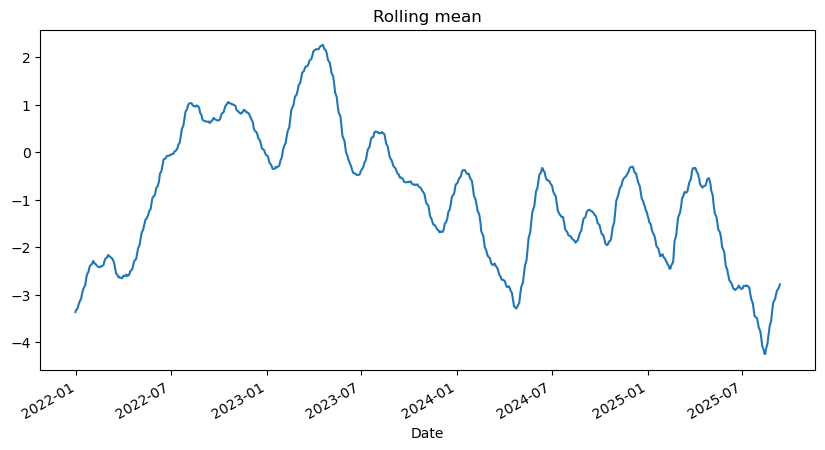

In [48]:
rolling_mean = spread.rolling(rolling_window).mean()

#Check to see how many missing values exist
print("\nMissing values in spread:\n",rolling_mean.isnull().sum())

#Check the first 10 valid values to ensure it runs
rolling_mean = rolling_mean.dropna()
print("\nFirst 10 values of spread:\n",rolling_mean.head(10))

#Plot for spread
rolling_mean.plot(title="Rolling mean", figsize = (10,5))

#RollingSD by Angel Lopez

##Why?
#For my feature, I did the rolling standard deviation of the spread between AMAT and NXPI for stock finance
#Spread is the difference between NXPI's actual value and AMAT's predicted value. Rolling SD measures the fluctuation of the spread (how big the spread is aka volatility).
#Volatility is used to judge the risk of investing at any given point, helping investors determine when it's best to invest.

#How?
#Via the data, weuse a rolling windows of a year of trading (about 252 days).
#Rolling SD is calculated each day based on the past 252 days worth of spread data. The greater the value, the greater volatility

#Missing Values?
#Missing values are handled by setting the first 251 rows with NaN. In "ml_data = pd.DataFrame(){...}", rows with NaN are dropped. Upon hitting row 252, we have usable data. In practice, we just go to each row until 252, which would be our first and by that point only row with data, so we don't have 252 rows then, just 1.

#Code:


First 10 values of Rolling SD:
 Date
2020-12-31   NaN
2021-01-04   NaN
2021-01-05   NaN
2021-01-06   NaN
2021-01-07   NaN
2021-01-08   NaN
2021-01-11   NaN
2021-01-12   NaN
2021-01-13   NaN
2021-01-14   NaN
dtype: float64

Missing values in rolling_std:
 251


<Axes: title={'center': 'Rolling SD of Spread'}, xlabel='Date'>

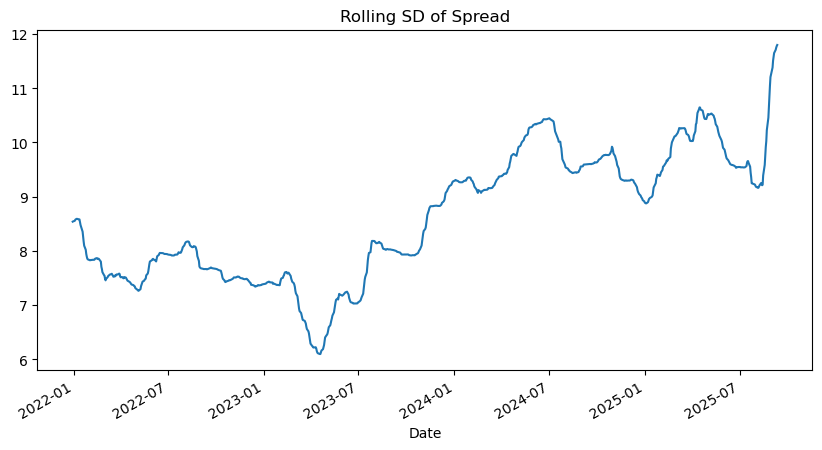

In [32]:
#Calculates the Rolling SD of the data Spread
rolling_std = spread.rolling(rolling_window).std()

#Check the first 10 values to ensure it runs
print("\nFirst 10 values of Rolling SD:\n", rolling_std.head(10))

#Check to see how many missing values exist
print("\nMissing values in rolling_std:\n", rolling_std.isnull().sum())

#Plot for Rolling SD
rolling_std.plot(title="Rolling SD of Spread", figsize=(10,5))

#Sajid-Z-score

#Why? Z-score is an important feature because it tells us how many standard deviations the current spread is away from its historical mean. Unlike spread (absolute divergence) and rolling SD (volatility), z-score standardizes the spread, making it possible to compare deviations at different times on the same scale.

#Missing Values: Each rolling feature (Spread, Rolling SD, Z-Score) could introduce missing values in the first 251 rows because a full 252-day window is required. These rows are dropped from the dataset to ensure all features align and remain usable. 

#How? We use the rolling mean and rolling standard deviation of the spread (over a 252-day window) to calculate z-score for each day. We calculate this for each day starting at index 252. Like spread and rolling SD, the first 251 rows will be missing values

#Z-score calculation


Missing values in z_score:
 251

First 10 values of z_score:
 Date
2021-12-30    0.746974
2021-12-31    0.710589
2022-01-03    0.808393
2022-01-04    1.130407
2022-01-05    0.686037
2022-01-06    0.655359
2022-01-07    0.608341
2022-01-10    0.775757
2022-01-11    1.073745
2022-01-12    0.448790
dtype: float64


<Axes: title={'center': 'Z-Score of Spread'}, xlabel='Date'>

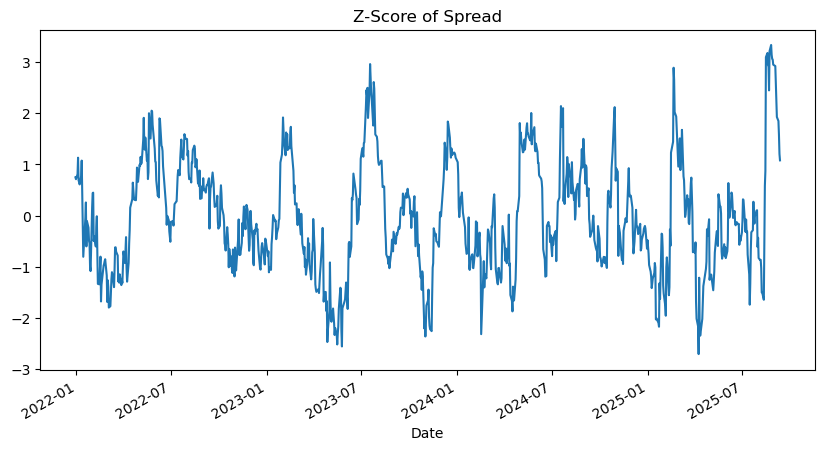

In [35]:
z_score = (spread - rolling_mean) / rolling_std
#Check to see how many missing values exist
print("\nMissing values in z_score:\n", z_score.isnull().sum())
#Check the first 10 valid values to ensure it runs
z_score = z_score.dropna()
print("\nFirst 10 values of z_score:\n", z_score.head(10))
#Plot z-score
z_score.plot(title="Z-Score of Spread", figsize=(10,5))

In [37]:
ml_data = pd.DataFrame({'spread':spread,
                        'rolling mean':rolling_mean,
                        'rolling std':rolling_std,
                        'z-score': z_score}, index = df.index)
ml_data = ml_data.dropna()

In [39]:
ml_data

,spread,rolling mean,rolling std,z-score
Date,,,,
2021-12-30,3.010568,-3.368103,8.539353,0.746974
2021-12-31,2.742600,-3.329253,8.544815,0.710589
2022-01-03,3.621087,-3.294995,8.555341,0.808393
2022-01-04,6.448585,-3.245130,8.575422,1.130407
2022-01-05,2.674021,-3.213982,8.582636,0.686037
...,...,...,...,...
2025-09-05,19.512834,-2.918181,11.648372,1.925678
2025-09-08,18.756455,-2.875703,11.707902,1.847655
2025-09-09,15.731778,-2.843775,11.747722,1.581205


In [41]:
ml_data.to_csv("my_data.csv",index=False)